# Modules
To carry out statistical tests in Python, we will be using an external module called [SciPy](https://www.scipy.org/), and to perform statistical modelling we will use the `ols` function from the external module [statsmodels](https://www.statsmodels.org/stable/index.html). To install these modules, launch the "Anaconda Prompt (Anaconda3)" program and run the following commands:

`conda install -c anaconda scipy`

`conda install -c conda-forge statsmodels`

<img src="../img/AZ_conda_prompt.png">

We will alias SciPy as `sp`, import the `ols` function from the `statsmodels.formula.api` module, and import numpy, pandas and plotnine using their usual aliases.

In [1]:
import scipy as sp
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import plotnine as p9

# Data
To demonstrate the data analysis functionality of Python, we will use the metabric dataset. Some of the functions we will use do not handle missing data, so we will remove any rows for the dataset where data is missing. As we saw in week 3, we can use the `describe()` method to generate summary statistics for this dataset:

In [2]:
metabric = pd.read_csv("../data/metabric_clinical_and_expression_data.csv").dropna()
metabric.describe()

,Cohort,Age_at_diagnosis,Survival_time,Tumour_size,Tumour_stage,Neoplasm_histologic_grade,Lymph_nodes_examined_positive,Lymph_node_status,Nottingham_prognostic_index,Mutation_count,ESR1,ERBB2,PGR,TP53,PIK3CA,GATA3,FOXA1,MLPH
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,2.207850,60.412721,126.239518,26.094112,1.756467,2.445138,1.873327,1.626227,4.123553,5.467440,9.600854,10.770958,6.238728,6.191980,5.950108,9.530585,10.839721,11.383495
std,0.956449,13.012218,77.295543,15.102221,0.622865,0.635888,3.830332,0.739443,1.059818,3.859249,2.093524,1.317631,1.020860,0.389334,0.310095,1.468576,1.687979,1.630174
min,1.000000,21.930000,0.100000,1.000000,1.000000,1.000000,0.000000,1.000000,2.002000,1.000000,5.217238,7.281883,4.945672,5.225320,5.158697,5.401414,5.289602,5.323652
25%,1.000000,50.820000,60.133333,17.000000,1.000000,2.000000,0.000000,1.000000,3.052000,3.000000,8.205776,9.981831,5.422349,5.936286,5.730861,8.809316,10.878608,11.071585
50%,2.000000,60.930000,116.433333,22.000000,2.000000,3.000000,0.000000,1.000000,4.046000,5.000000,10.220349,10.532638,5.864217,6.176018,5.931565,9.917441,11.365047,11.857401
75%,3.000000,69.700000,188.733333,30.000000,2.000000,3.000000,2.000000,2.000000,5.046000,7.000000,11.202333,11.149977,6.902124,6.439989,6.134401,10.554370,11.749098,12.374549
max,5.000000,96.290000,337.033333,180.000000,4.000000,3.000000,41.000000,3.000000,6.360000,46.000000,13.265184,14.643900,9.932115,7.769900,8.708396,12.812082,13.127682,14.432001


In [3]:
metabric.dtypes

Patient_ID                        object
Cohort                             int64
Age_at_diagnosis                 float64
Survival_time                    float64
Survival_status                   object
Vital_status                      object
Chemotherapy                      object
Radiotherapy                      object
Tumour_size                      float64
Tumour_stage                     float64
Neoplasm_histologic_grade        float64
Lymph_nodes_examined_positive      int64
Lymph_node_status                  int64
Cancer_type                       object
ER_status                         object
PR_status                         object
HER2_status                       object
HER2_status_measured_by_SNP6      object
PAM50                             object
3-gene_classifier                 object
Nottingham_prognostic_index      float64
Cellularity                       object
Integrative_cluster               object
Mutation_count                   float64
ESR1            

# Statistical tests

## Tests for normality
When we are deciding which statistical test to use in our analysis, we often need to work out whether the data follows a normal distribution or not, as some tests (e.g. t-test) assume that our data are normally distributed. We can test whether a dataset follows a normal distribution by using the Kolmogorov-Smirnov test. For example, the age at diagnosis looks like it could be normally distributed:

/home/kpvv542/.conda/envs/kpvv542/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 21'. Pick better value with 'binwidth'.


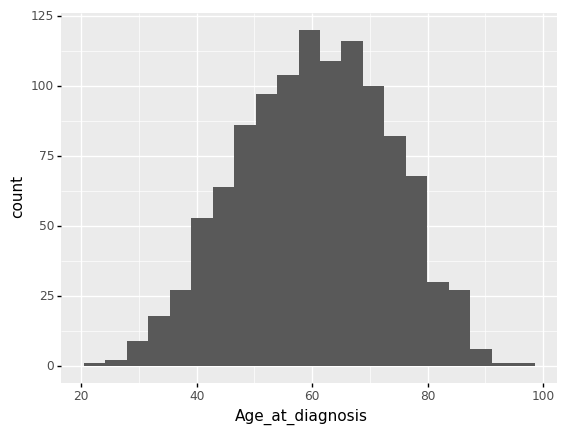

<ggplot: (8747657395577)>

In [4]:
(
p9.ggplot(metabric, p9.aes("Age_at_diagnosis"))
    + p9.geom_histogram()
)

To run the Kolmogorov-Smirnov test, we use the `kstest()` function from the scipy stats module:

In [5]:
sp.stats.kstest(metabric["Age_at_diagnosis"], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

The Kolmogorov-Smirnov test has a p value below 0.05, indicating that we can reject the null hypothesis that there is no difference between this distribution and a normal distribution. In other words, the distribution appears non-normal.

In SciPy, the results of most tests are returned as an object. When printed directly to screen this is not very pretty and hard to interpret,  as we can see above. When running the test, we can assign the results object to a variable, and then access the attributes of the results object to print the results in a clearer format:

In [6]:
# run the test and assign the result to a variable
age_diagnosis_ks = sp.stats.kstest(metabric["Age_at_diagnosis"], "norm")
# print the results by retrieving attributes from the result object 
print("Age at diagnosis Kolmogorov-Smirnov test:")
print("p value = {}".format(age_diagnosis_ks.pvalue))

Age at diagnosis Kolmogorov-Smirnov test:
p value = 0.0


An alternative to KS test is the Shapiro-Wilk (SW) test. Similar to the KS test. the SW test yield a p-value, but does not compare the distribution at stake with any refrendce distribution.

As a rule of thumb, the SW test is preffered over the KS test when the number of dada points is low (usually < 30).

In [7]:
# run the test and assign the result to a variable
age_diagnosis_ks = sp.stats.shapiro(metabric["Age_at_diagnosis"])
# print the results by retrieving attributes from the result object 
print("Age at diagnosis Shapiro-Wilk:")
print("p value = {}".format(age_diagnosis_ks[1]))

Age at diagnosis Shapiro-Wilk:
p value = 0.000182539748493582


## Correlation
We often want to test whether two continuous variables are related to each other, and we can do this by calculating a correlation. For example, there appears to be a relationship between the expression of the ESR1 gene and the GATA3 gene:

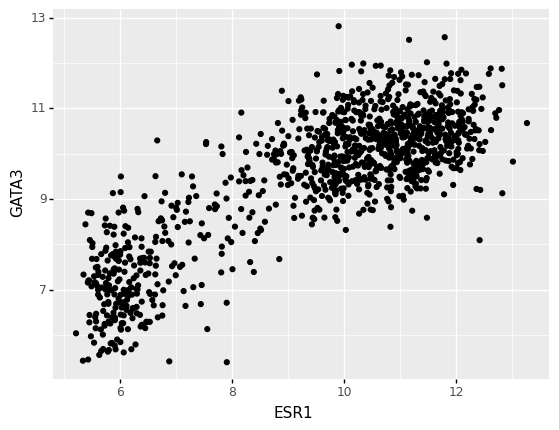

<ggplot: (8747621704400)>

In [8]:
(
p9.ggplot(metabric, p9.aes("ESR1", "GATA3"))
    + p9.geom_point()
)

For normally distributed data, we can calculate the Pearson's correlation using the `pearsonr()` function. `pearsonr()` returns the results as a tuple rather than an object, so we need to access the coefficient and p value using indexing:

In [9]:
ESR1_GATA3_pearson = sp.stats.pearsonr(metabric["ESR1"], metabric["GATA3"])
print("Pearson correlation between ESR1 & GATA3:")
print("coefficient = {}".format(ESR1_GATA3_pearson[0]))
print("p value = {}".format(ESR1_GATA3_pearson[1]))

Pearson correlation between ESR1 & GATA3:
coefficient = 0.8282016709899256
p value = 1.1342109305361631e-283


For data that is not normally distributed, we can calculate the Spearman rank correlation. For example, a scatter plot of tumour size versus mutation count suggests that these are not normally distributed:

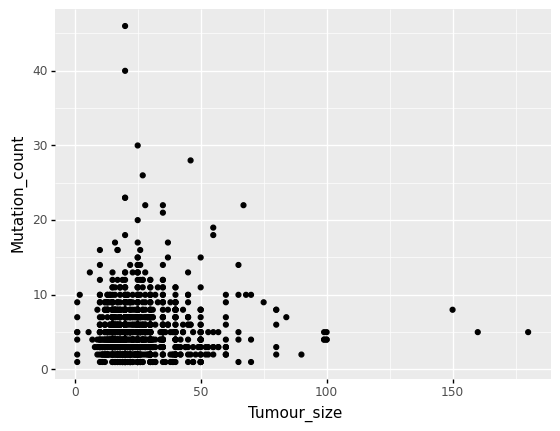

<ggplot: (8747621557833)>

In [10]:
(
p9.ggplot(metabric, p9.aes("Tumour_size", "Mutation_count"))
    + p9.geom_point()
)

We can calculate the Spearman rank correlation using the `spearmanr()` function, again accessing the results using indexing:

In [11]:
size_mutation_spearman = sp.stats.spearmanr(metabric["Tumour_size"], metabric["Mutation_count"])
print("Spearman rank correlation between tumour size and mutation count:")
print("coefficient = {}".format(size_mutation_spearman[0]))
print("p value = {}".format(size_mutation_spearman[1]))

Spearman rank correlation between tumour size and mutation count:
coefficient = 0.0070724805027381175
p value = 0.8130176386734044


## T-test
To test whether the mean value of a continuous variable is significantly different between two different groups, we can use the t-test for normally distributed data. For example, age at diagnosis appears to be lower for ER-negative tumours compared with ER-positive tumours:

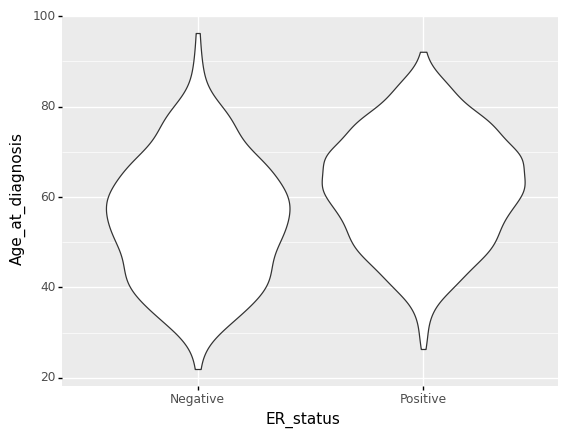

<ggplot: (8747621585884)>

In [12]:
(
p9.ggplot(metabric, p9.aes("ER_status", "Age_at_diagnosis"))
    + p9.geom_violin()
)

We can use the `ttest_ind()` function to carry out the t-test, which confirms that we can reject the null hypothesis that age at diagnosis is not different between ER positive and negative tumours. Note that `ttest_ind()` takes two arguments, which are the values of the two groups. Rather than extracting these values and assigning them to separate variables, we can do the data extraction within the function call:

In [13]:
ER_age_t = sp.stats.ttest_ind(
    # select samples with Negative ER_status and extract the Age_at_diagnosis values
    metabric[metabric["ER_status"]=="Negative"]["Age_at_diagnosis"],
    # select samples with Positive ER_status and extract the Age_at_diagnosis values
    metabric[metabric["ER_status"]=="Positive"]["Age_at_diagnosis"]
)
print("t test of age at diagnosis for ER_status Negative vs Positive:")
print("t = {}".format(ER_age_t.statistic))
print("p = {}".format(ER_age_t.pvalue))

t test of age at diagnosis for ER_status Negative vs Positive:
t = -7.543060668278905
p = 9.471433611351617e-14


If we have data that is not normally distributed we may want to use the Mann-Whitney U test, also known as the Wilcoxon rank-sum test, which is the non-parametric equivalent of the t-test. For example, survival time does not follow a normal distribution, but it still appears to be different between ER positive and ER negative tumours:

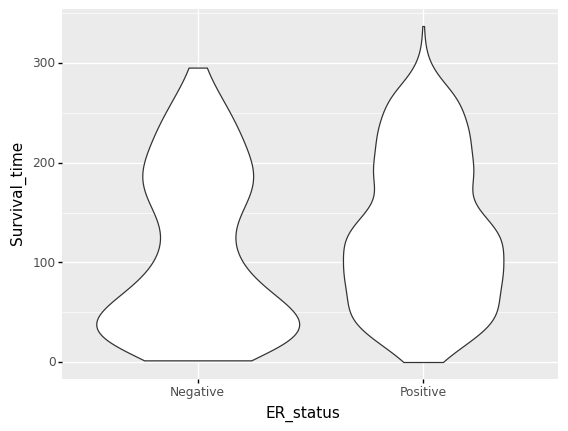

<ggplot: (8747621585860)>

In [14]:
(
p9.ggplot(metabric, p9.aes("ER_status", "Survival_time"))
    + p9.geom_violin()
)

We can use the `mannwhitneyu()` function to run the Mann-Whitney U test, which confirms that we can reject the null hypothesis that age at diagnosis is not different between ER positive and negative tumours. Again, we are subsetting and selecting the data within the function call:

In [15]:
ER_survival_MWU = sp.stats.mannwhitneyu(
    # select samples with Negative ER_status and extract the Age_at_diagnosis values
    metabric[metabric["ER_status"]=="Negative"]["Age_at_diagnosis"],
    # select samples with Positive ER_status and extract the Age_at_diagnosis values
    metabric[metabric["ER_status"]=="Positive"]["Age_at_diagnosis"]
)
print("Mann-Whitney U test of survival time for ER_status Negative vs Positive:")
print("f = {}".format(ER_survival_MWU.statistic))
print("p = {}".format(ER_age_t.pvalue))

Mann-Whitney U test of survival time for ER_status Negative vs Positive:
f = 77360.0
p = 9.471433611351617e-14


## ANOVA
If we want to test for a difference in the mean value of a continuous variable between >2 groups simultaneously, we can use the analysis of variance (ANOVA). For example, we may want to test for differences between survival times between different cancer types, which appear to be different:

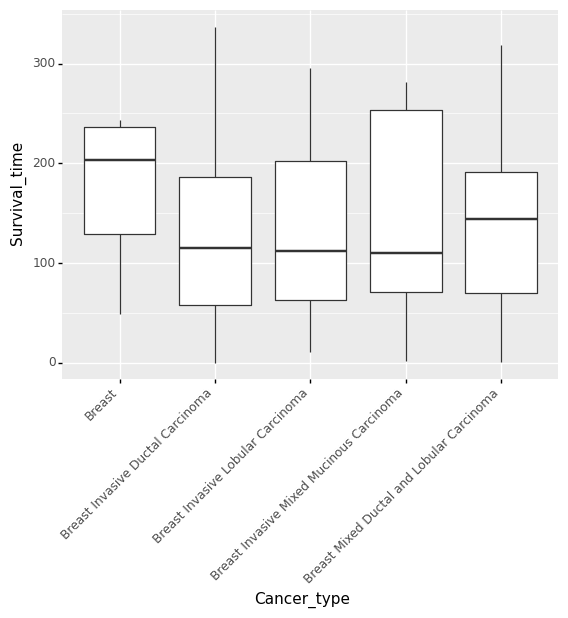

<ggplot: (8747619664381)>

In [16]:
(
p9.ggplot(metabric, p9.aes("Cancer_type", "Survival_time"))
    + p9.geom_boxplot()
    + p9.theme(axis_text_x = p9.element_text(angle=45, hjust=1))
)

We can use the `f_oneway()` function to run ANOVA, which shows that we cannot reject the null hypothesis that there is no difference in survival time between cancer types:

In [17]:
type_survival_anova = sp.stats.f_oneway(
    # select samples with Breast cancer and extract the Survival_time values
    metabric[metabric["Cancer_type"]=="Breast"]["Survival_time"],
    # select samples with Breast cancer and extract the Survival_time values
    metabric[metabric["Cancer_type"]=="Breast Invasive Ductal Carcinoma"]["Survival_time"],
    # select samples with Breast cancer and extract the Survival_time values
    metabric[metabric["Cancer_type"]=="Breast Invasive Lobular Carcinoma"]["Survival_time"]
)
print("ANOVA of survival time for different cancer types:")
print("f = {}".format(type_survival_anova.statistic))
print("p = {}".format(type_survival_anova.pvalue))

ANOVA of survival time for different cancer types:
f = 1.379853048593756
p = 0.25211254882000633


## Chi-square test
If we have two categorical variables of interest, and we want to test whether the status of one variable is linked to the status of the other, we can use the chi-square test. For example, we may want to test whether the ER status of a tumour (Positive or Negative) is linked to the PR status (Positive or Negative). First, we need to format the data into a contingency table, containing counts of positive and negative values for ER and PR:

In [ ]:
# use the crosstab function to make a contingency table of the total numbers of patients that are ER+ & PR+, ER+ & PR-, ER- & PR+, and ER- & PR-
ER_PR_contingency = pd.crosstab(metabric["ER_status"], metabric["PR_status"])
ER_PR_contingency

Now, we use the `chi2_contingency()` function to run the chi-square test, and assign the results to a variable. This shows that we can reject the null hypothesis that ER and PR status are independent. The results are returned as a tuple rather than an object, so we retrieve them by using indexing:

In [ ]:
ER_PR_chi = sp.stats.chi2_contingency(ER_PR_contingency)
print("Chi-square test for ER and PR status:")
print("Chi-square value = {}".format(ER_PR_chi[0]))
print("p value = {}".format(ER_PR_chi[1]))

# Data Transformation
When working with large datasets, we often have variables with very different ranges and distributions of values. For some analyses, particularly statistical modelling, it is helpful to be able to apply a mathematical transformation to a set of values, which rescales the values and makes their distribution and range more similar to other variables in the dataset. For example, in the Metabric dataset the distribution of tumour sizes is highly left-skewed, as most tumours are small but a few are very large:

In [ ]:
(
p9.ggplot(metabric, p9.aes("Tumour_size"))
    + p9.geom_histogram()
)

To perform transformations on this data, we can use some functions from numpy:
- `sqrt()` = square-root transform
- `log2()` = log-transform with base 2
- `log10()` = log-transform with base 10

All of these functions return a pandas series of transformed values. To retain the original (untransformed) data, we can add these transformed values to the metabric dataframe as a new column:

In [ ]:
metabric["Tumour_size_sqrt"] = np.sqrt(metabric["Tumour_size"])
metabric["Tumour_size_log2"] = np.log2(metabric["Tumour_size"])
metabric["Tumour_size_log10"] = np.log10(metabric["Tumour_size"])

After transformation, the tumour sizes look closer to being normally distributed:

In [ ]:
# select the variables of interest
tumour_size_tranformations = metabric.loc[:,["Patient_ID", "Tumour_size", "Tumour_size_sqrt", "Tumour_size_log2", "Tumour_size_log10"]]
# rename the columns for ease of plotting
tumour_size_tranformations.columns = ["Patient_ID", "Untransformed", "sqrt", "log2", "log10"]
# reformat the untransformed and transformed data into three columns ahead of plotting
tumour_size_tranformations = pd.melt(tumour_size_tranformations, id_vars="Patient_ID", var_name="Transformation", value_name="Size")
# plot faceted histogram
(
p9.ggplot(tumour_size_tranformations, p9.aes("Size"))
    + p9.facet_wrap("~Transformation", nrow=2, scales="free")
    + p9.geom_histogram(bins=50)
)

# Modelling

## Simple linear regression
If we have a continuous variable, and we want to model its relationship with another variable, we can use simple linear regression. In linear regression we call the variable of interest the **response**, and the other variable the **predictor**. The mathematical details of linear regression are beyond the scope of this course, but in the case of simple linear regression it basically amounts to fitting a line through the data that is closest to all of the points. For example, we may want to predict survival time based on tumour size, because survival time appears to differ across the range of tumour sizes:

In [ ]:
(
p9.ggplot(metabric, p9.aes("Tumour_size", "Survival_time"))
    + p9.geom_point()
)

In Python, we can run simple linear regression using the `ols` function from the `statsmodels` package. There are three steps to completing this analysis:
1. **Instantiate** the model: create an object that holds the model specification and the input dataset. In the model specification, the response is to the left of the tilda `~` and the predictor is to the right
2. **Fit** the model: fit the specified model to the data using the `fit()` function, and assign the results object to a variable
3. **Display** the results: use the `summary()` method of the results object to return a detailed breakdown of the model characteristics

In [ ]:
# instantiate model
simple_model = ols("Survival_time~Tumour_size", data=metabric)
# fit the model
simple_results = simple_model.fit()
# display the results
simple_results.summary()

The model summary contains a lot of detailed information, but we can create a more concise report of the results by extracting the results of interest e.g. the r2 value, the F-statistic and its p value:

In [ ]:
print("Simple linear regression: Survival_time~Tumour_size")
print("r2 = {}".format(simple_results.rsquared))
print("F-statistic = {}".format(simple_results.fvalue))
print("F-statistic p value= {}".format(simple_results.f_pvalue))

After fitting a linear regression model, we usually want to carry out some basic checks of the model characteristics. This is because linear regression makes some assumptions about the data and our model, and if the data that we have fitted our model to has violated these assumptions, then the predictions from the model may not be reliable. We will not cover these checks in this session as they are beyond the scope of the course, but if you want information on how to do this then please see the [statsmodels documentation](https://www.statsmodels.org/stable/index.html).

If we are happy with the checks of model characteristics, we can use the model to predict what the value of our response variable will be, given a certain value for the predictor variable. We do this using the `predict()` method of the results object, which takes the value of the predictor variable as the argument:

In [ ]:
simple_results.predict({"Tumour_size": 125})

Our model predicts a survival time of 8.6 for a tumour size of 125; however, the low r2 value for this model (r2=0.053) indicates that it fits the data very poorly, so we may not be very confident in this prediction.

## Multivariate linear regression
When we are analysing more complex processes, we often need to consider the influence of multiple predictors simultaneously. One way to do this is by using multivariate linear regression, which models the relationship between the response and two or more predictors. For example, we may wish to model the effect on survival time of tumour size, tumour stage, cancer type and ER status. To do this we repeat the simple regression process described above, but specify multiple predictors when instantiating the model. When viewing the results, we extract the `pvalues` attribute of the results object to print the p values associated with each predictor:

In [ ]:
# instantiate model
complex_model = ols("Survival_time~Tumour_size + Tumour_stage + Cancer_type + ER_status", data=metabric)
# fit the model
complex_results = complex_model.fit()
# print the results of interest
print("Complex linear regression: Survival_time~Tumour_size + Tumour_stage + Cancer_type + ER_status")
print("r2 = {}".format(complex_results.rsquared))
print("F-statistic = {}".format(complex_results.fvalue))
print("F-statistic p value= {}".format(complex_results.f_pvalue))
print("p values for each predictor:")
print(complex_results.pvalues)

Including these extra predictors has almost doubled the r2, but the model fit is still quite poor (r2=0.098). Given the complexity of breast cancer biology and the relative simplicity of our analysis, this isn't a big surprise!

# Exercises

## Exercise 1
Is there a significant difference between the tumour size of patients who received chemotherapy versus patients that did not receive chemotherapy? Use either the t-test or Mann-Whitney U test, and provide a visualization to compare tumour size between patients who did or did not receive chemotherapy. When deciding which test to use, remember to check whether the data is normally distributed or not.

## Exercise 2
Is there a correlation between tumour size and survival time? If so, does the correlation become weaker or stronger after tumour size is log10-transformed? Generate a visualization of the relationship between log10-transformed tumour size and survival time.

## Exercise 3
Make a contingency table of the number of patients that did or did not receive chemotherapy and did or did not receive radiotherapy, and use a chi-square test to investigate whether the incidence of these treatments are independent of each other.